### First we import the necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Now we load the data using pandas and display only 5 data points using head()

In [3]:
dataset = pd.read_csv("./mobile.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Cleaning

In [7]:
dataset.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
# Eliminating NaN or missing input numbers
dataset.fillna(method ='ffill', inplace = True)

In [9]:
# Dropping unwanted columns
new_dataset=dataset.drop(['fc','m_dep','sc_h','sc_w','px_height','px_width','talk_time','wifi'],axis=1)
new_dataset.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,mobile_wt,n_cores,pc,ram,three_g,touch_screen,price_range
0,842,0,2.2,0,0,7,188,2,2,2549,0,0,1
1,1021,1,0.5,1,1,53,136,3,6,2631,1,1,2
2,563,1,0.5,1,1,41,145,5,6,2603,1,1,2
3,615,1,2.5,0,0,10,131,6,9,2769,1,0,2
4,1821,1,1.2,0,1,44,141,2,14,1411,1,1,1


In [45]:
## Selecting the target and features
features=new_dataset.iloc[:,:-1]
print(features.head())

   battery_power  blue  clock_speed  dual_sim  four_g  int_memory  mobile_wt  \
0            842     0          2.2         0       0           7        188   
1           1021     1          0.5         1       1          53        136   
2            563     1          0.5         1       1          41        145   
3            615     1          2.5         0       0          10        131   
4           1821     1          1.2         0       1          44        141   

   n_cores  pc   ram  three_g  touch_screen  
0        2   2  2549        0             0  
1        3   6  2631        1             1  
2        5   6  2603        1             1  
3        6   9  2769        1             0  
4        2  14  1411        1             1  


In [46]:
target=new_dataset.iloc[:,12]
print(np.ravel(target))

[1 2 2 ... 3 0 3]


In [47]:
target.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

## Descriptive Statistics

In [48]:
features.mean()q

battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
four_g              0.52150
int_memory         32.04650
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
ram              2124.21300
three_g             0.76150
touch_screen        0.50300
dtype: float64

In [49]:
target.mean()

1.5

In [50]:
features.median()

battery_power    1226.0
blue                0.0
clock_speed         1.5
dual_sim            1.0
four_g              1.0
int_memory         32.0
mobile_wt         141.0
n_cores             4.0
pc                 10.0
ram              2146.5
three_g             1.0
touch_screen        1.0
dtype: float64

## Visulaizing the features and target with box plot and histogram

(array([[   0.,  422.,  545.,  512.,  521.,    0.,    0.,    0.,    0.,
            0.],
        [2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [  72.,  232.,  189.,  225.,  201.,  238.,  216.,  192.,  211.,
          224.],
        [2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2000.,    0.

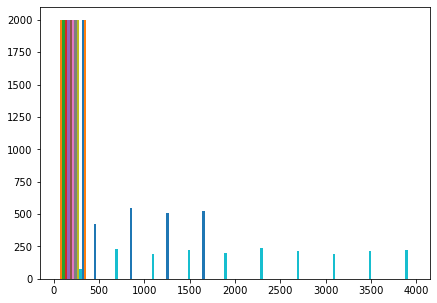

In [51]:
plt.figure(figsize=(7,5))
plt.hist(features)

(array([500.,   0.,   0., 500.,   0.,   0., 500.,   0.,   0., 500.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

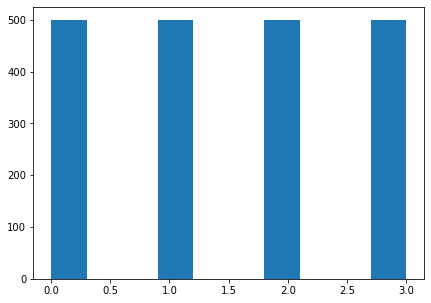

In [52]:
plt.figure(figsize=(7,5))
plt.hist(target)

### Using box plot for the visualization of features and target

{'whiskers': [<matplotlib.lines.Line2D at 0x1750d9b3700>,
 'caps': [<matplotlib.lines.Line2D at 0x1750d9b3e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1750d9b39a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1750dbe7a30>,
 'fliers': [<matplotlib.lines.Line2D at 0x1750dbe78e0>,
 'means': []}

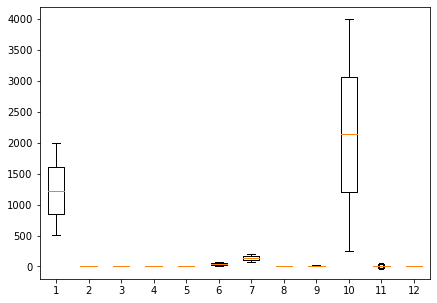

In [53]:
plt.figure(figsize=(7,5))
plt.boxplot(features)

C:\Users\Peshal Regmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


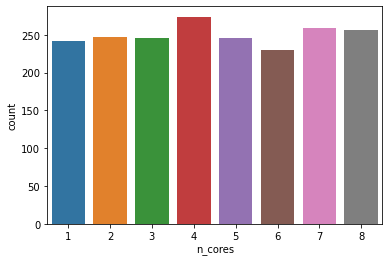

In [54]:
import seaborn as sns
sns.countplot(features['n_cores'],label="Count")
plt.show()

## Showing box plot for each input/features to get the clearer idea of distribution of the features

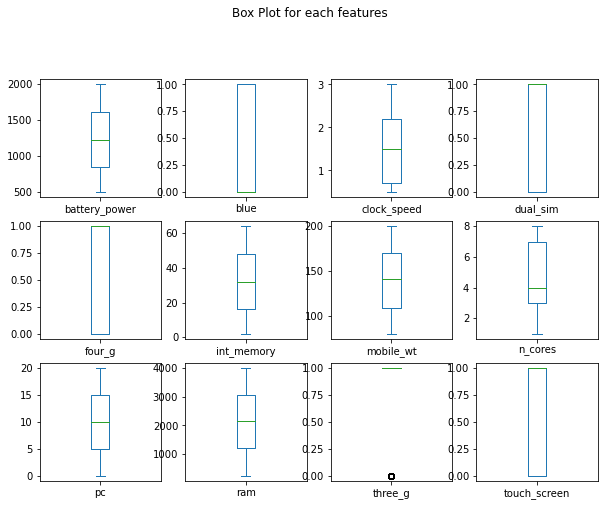

In [55]:
features.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,10), 
                                        title='Box Plot for each features')
plt.savefig('features_box')
plt.show()

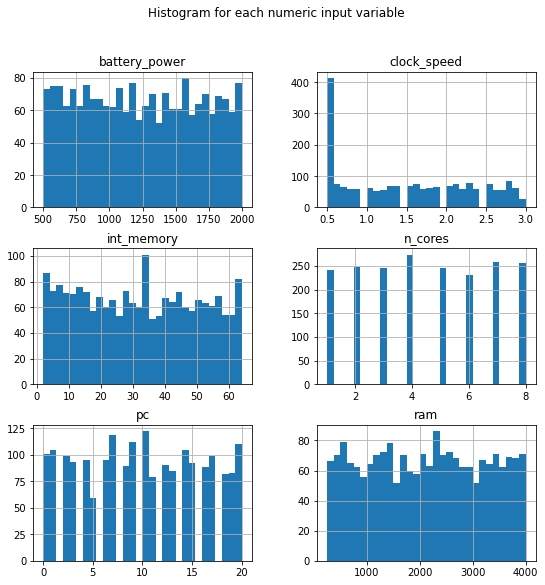

In [17]:
import pylab as pl
features.drop(['blue','mobile_wt','dual_sim','touch_screen','three_g','four_g'] ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('features_hist')
plt.show()

# Here cleaning of data is further done by analyzing the boxplot and dropping features that are not necessary.

### .Here we can clearly observe that some pairs of attributes such as int_memory anad ram are corelated.This provides an idea for a predictable relationship and high correlation.

## Now the scatter matrix of each features is observed

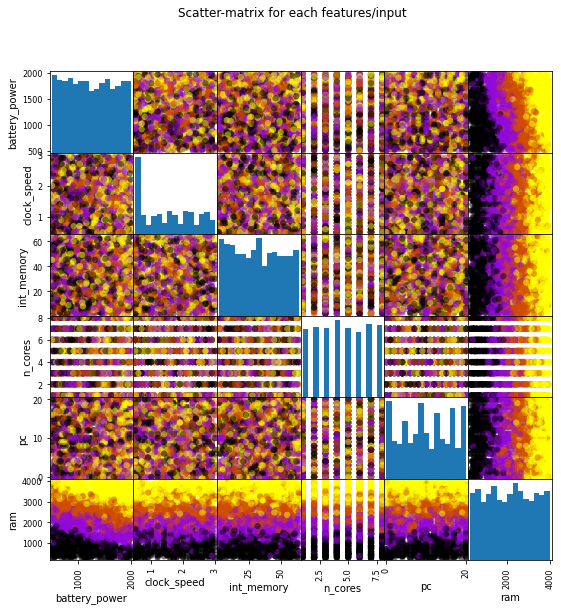

In [40]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
X = features.drop(['touch_screen','dual_sim','four_g','three_g','mobile_wt','blue'],axis=1)
y = target
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each features/input')
plt.savefig('mobile_scatter_matrix')


### Data Cleaning

### The unwanted features have been dropped 

In [19]:
#Applying minmaxScaler()to scale the numeric data and creating train and test sets with scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building a Logistic regression model

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.82


### The next step is to peroform RandomForestClassifier()
## Let's use 70% for train and 30% for test

In [21]:
#We need train_test_split() from sklearn in order to divide our data.
from sklearn.model_selection import train_test_split

In [22]:
## Let's check the shape of the feature and target
print("Feature shape:",features.shape)
print("Target shape:",target.shape)

Feature shape: (2000, 12)
Target shape: (2000,)


In [23]:
## Splitting the dataset into train and test 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

## Printing the dimension of train and test dataset to check for inconsistency.

In [24]:
print("x_train dimension: ",x_train.shape)
print("y_train dimension: ",y_train.shape)

x_train dimension:  (1400, 8)
y_train dimension:  (1400,)


In [25]:
print("x_test dimension: ",x_test.shape)
print("y_test dimension: ",y_test.shape)

x_test dimension:  (600, 8)
y_test dimension:  (600,)


In [26]:
assert x_train.shape[0] == y_train.shape[0]
#Checking for the shape of train datasets

## Now the implementation of Random Forest Classifier starts

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, np.ravel(y_train)) ##fitting the model

RandomForestClassifier()

### Now we display the classification error in the dataset

In [28]:
y_pred = rfc.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       153
           1       0.81      0.74      0.77       160
           2       0.68      0.70      0.69       143
           3       0.81      0.88      0.84       144

    accuracy                           0.81       600
   macro avg       0.80      0.81      0.80       600
weighted avg       0.81      0.81      0.80       600



### In the next step cross-validation is performed to tune the hyper parameters

### K-Fold

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
StratifiedKFold,cross_val_score, cross_val_predict

(sklearn.model_selection._split.StratifiedKFold,
 <function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>,
 <function sklearn.model_selection._validation.cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', method='predict')>)

In [30]:
# Steps of  Kfold Validation
cv1 = KFold(n_splits=2, random_state = 12, shuffle=True)      
scores_kfold = cross_val_score(rfc, features, target, scoring='accuracy',
                               cv=cv1, n_jobs=-1)
scores_kfold
print("%0.2f accuracy with a standard deviation of %0.2f" % 
      (scores_kfold.mean(), scores_kfold.std()))


0.79 accuracy with a standard deviation of 0.01


### Perfoming Stratified Cross validation to check the accuracy

In [31]:
# Cross Validation - Kfold Validation
skfold = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
scores_skfold = cross_val_score(rfc, features, target, 
                                scoring='accuracy', cv=skfold, n_jobs=-1)
scores_skfold
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_skfold.mean(), scores_skfold.std()))


0.79 accuracy with a standard deviation of 0.01


### Now lets perform cross validation with randomized search CV

In [32]:
# Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
random_search = {'criterion': ['entropy', 'gini'],
 'max_depth': list(np.linspace(5, 1200, 10, dtype = int)) + [None],
 'max_features': ['auto', 'sqrt','log2', None],
 'min_samples_leaf': [4, 6, 8, 12],
 'min_samples_split': [3, 7, 10, 14],
 'n_estimators': list(np.linspace(5, 1200, 3, dtype = int))} ##Dictionary
clf = RandomForestClassifier()
modelrf = RandomizedSearchCV(estimator = clf, 
                             param_distributions = random_search, 
 cv = 4, verbose= 5, random_state= 101, n_jobs = -1)#parallel procressing(n-jobs)
modelrf.fit(x_train, np.ravel(y_train))
modelrf.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


{'n_estimators': 1200,
 'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 668,
 'criterion': 'gini'}

In [33]:
#Now the classification error is checked agian using the report obtained from randomized search
y_pred_randomized = modelrf.predict(x_test)
print(classification_report(y_pred_randomized, y_test))


              precision    recall  f1-score   support

           0       0.93      0.90      0.92       155
           1       0.78      0.78      0.78       146
           2       0.73      0.70      0.71       155
           3       0.81      0.87      0.84       144

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



## Univariate Feature Selection

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=2).fit_transform(x_train, y_train)
X_new.shape

(1400, 2)

## Visualization of the selected features

(array([[143., 356., 327., 340., 234.,   0.,   0.,   0.,   0.,   0.],
        [146., 135., 140., 140., 142., 145., 134., 138., 137., 143.]]),
 array([ 258.,  632., 1006., 1380., 1754., 2128., 2502., 2876., 3250.,
        3624., 3998.]),
 <a list of 2 BarContainer objects>)

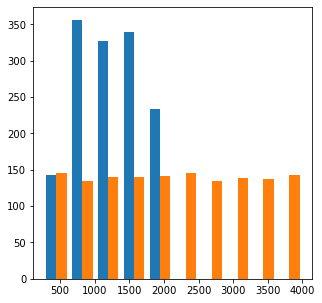

In [39]:
plt.figure(figsize=(5,5))
plt.hist(X_new)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_new, np.ravel(y_train)) ##fitting the model

RandomForestClassifier()

In [37]:
y_pred = rfc.predict(X_new)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       354
           2       1.00      1.00      1.00       352
           3       1.00      1.00      1.00       345

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



Conclusion:
    Therefore, it can be clearly observed that  various cross validation techinques can be to tune the hyper parameters.We have to build our model by selecting the only required features.Our goal is to build a model that provides the best accuracy.